In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from tensorflow.keras.applications import ResNet50

In [5]:
model = ResNet50(include_top=False, pooling='avg', weights='imagenet', input_tensor=None)


94773248/94765736 [==============================] - 1s 0us/step


In [6]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
len(model.layers)

176

In [0]:
import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os

from skimage.transform import resize
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import RMSprop, Adam
sys.version

Using TensorFlow backend.


'3.6.9 (default, Nov  7 2019, 10:44:02) \n[GCC 8.3.0]'

In [0]:
!unzip -q "drive/My Drive/test fish/Dataset.zip"

In [0]:
base_path = "Dataset"
categories = os.listdir(os.path.join(os.getcwd(),"Dataset"))

In [0]:
print(categories)

['Mandarin', 'Tuna', 'Layur', 'Chelmon Rostratus', 'Barred Thicklip', 'Angler Frog', 'Blackbar Soldierfish', 'Bawal', 'Lumba-Lumba', 'Baracuda', 'Indigo Hamlet', 'Triggerfish', 'Yellow Tangfish', 'Rainbow', 'Paus Pembunuh', 'Pari', 'Kakap-Merah', 'Blackbar chromis', 'Lemadeng', 'Neoniphon Sammara', 'Giru (Nemo)', 'Julung-Julung', 'Hiu Paus', 'Chevron Butterflyfish', 'Kuwe Gerong', 'Lemon', 'Dottyback', 'Kakaktua', 'Oval Butterflyfish', 'Banggai Cardinal', 'King Anglefish', 'Terbang', 'Foureye Butterflyfish', 'Bibir Merah', 'Yellow Watchman Godies', 'Marlin', 'Kerapu', 'Black Saddled Toby', 'Belanak', 'Moorish Idol', 'Blue Devil', 'Blackghost', 'Hiu Putih', 'Lepu Ayam', 'Napoleon', 'Paus Sirip', 'Vanikoro Sweeper', 'Buntal', 'Brown Tangfish', 'Anthias']


In [0]:
fnames = []
for category in categories:
    fish_folder = os.path.join(base_path, category)
    file_names = os.listdir(fish_folder)
    full_path = [os.path.join(fish_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

In [0]:
images = []
for names in fnames:
    one_category_images = [cv2.imread(name) for name in names if (cv2.imread(name)) is not None]
    images.append(one_category_images)

In [0]:
print('number of images for each category:', [len(f) for f in images])

number of images for each category: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]


In [0]:
for i,imgs in enumerate(images):
    shapes = [img.shape for img in imgs]
    widths = [shape[0] for shape in shapes]
    heights = [shape[1] for shape in shapes]
    print('%d,%d is the min shape for %s' % (np.min(widths), np.min(heights), categories[i]))

160,240 is the min shape for Mandarin
134,250 is the min shape for Tuna
105,211 is the min shape for Layur
183,242 is the min shape for Chelmon Rostratus
77,75 is the min shape for Barred Thicklip
169,220 is the min shape for Angler Frog
129,200 is the min shape for Blackbar Soldierfish
156,160 is the min shape for Bawal
177,265 is the min shape for Lumba-Lumba
129,200 is the min shape for Baracuda
140,211 is the min shape for Indigo Hamlet
165,220 is the min shape for Triggerfish
160,197 is the min shape for Yellow Tangfish
143,183 is the min shape for Rainbow
149,220 is the min shape for Paus Pembunuh
150,218 is the min shape for Pari
133,220 is the min shape for Kakap-Merah
183,208 is the min shape for Blackbar chromis
147,225 is the min shape for Lemadeng
225,225 is the min shape for Neoniphon Sammara
182,183 is the min shape for Giru (Nemo)
176,259 is the min shape for Julung-Julung
229,350 is the min shape for Hiu Paus
120,200 is the min shape for Chevron Butterflyfish
120,211 is

In [0]:
def cvtRGB(img):
    return cv2.cvtColor(img.copy(), cv2.COLOR_BGR2RGB)

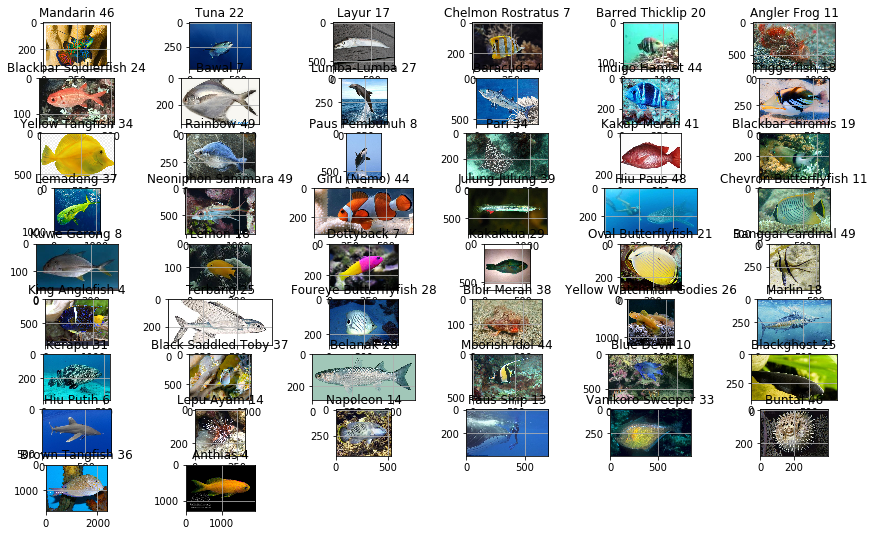

In [0]:
plt.figure(figsize=(15,10))
for i, imgs in enumerate(images):
    plt.subplot(10,6,i+1)
    idx = np.random.randint(len(imgs))
    plt.imshow(cvtRGB(imgs[idx]))
    plt.grid('off')
    plt.title(categories[i]+' '+str(idx))
plt.show()

(601, 900, 3)
(150, 150, 3)


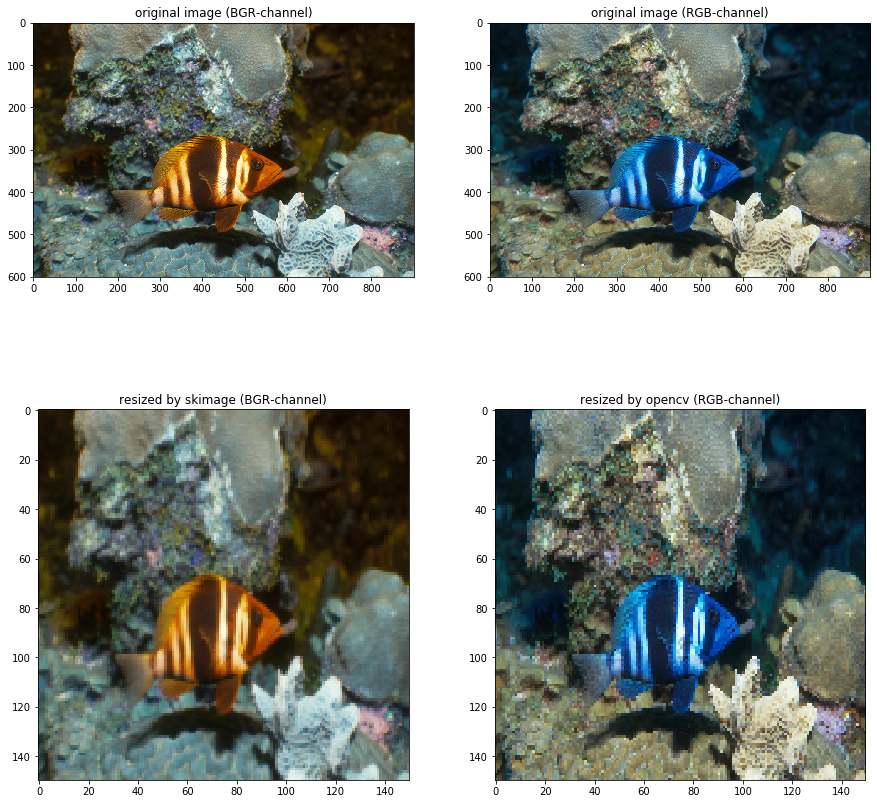

In [0]:
img_width, img_height = 150, 150

img = images[10][10]
print(img.shape)
resized_img = resize(img, (img_width, img_height, 3))
resized_img2 = cv2.resize(img,(img_width, img_height), interpolation = cv2.INTER_CUBIC)
print(resized_img.shape)
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('original image (BGR-channel)')
plt.grid(False)
plt.imshow(img)
plt.subplot(2,2,2)
plt.title('original image (RGB-channel)')
plt.grid(False)
plt.imshow(cvtRGB(img))
plt.subplot(2,2,3)
plt.title('resized by skimage (BGR-channel)')
plt.grid(False)
plt.imshow((resized_img))
plt.subplot(2,2,4)
plt.title('resized by opencv (RGB-channel)')
plt.grid(False)
plt.imshow(cvtRGB(resized_img2))
plt.show()

In [0]:
resized_images = []
for i,imgs in enumerate(images):
    resized_images.append([cv2.resize(img, (img_width, img_height), interpolation = cv2.INTER_CUBIC) for img in imgs])

In [0]:
train_images = []
val_images = []
for imgs in resized_images:
    train, test = train_test_split(imgs, train_size=0.8, test_size=0.2)
    train_images.append(train)
    val_images.append(test)

In [0]:
len_train_images = [len(imgs) for imgs in train_images]
print(len_train_images)
print('sum of train images:', np.sum(len_train_images))
train_categories = np.zeros((np.sum(len_train_images)), dtype='uint8')
for i in range(50):
    if i is 0:
        train_categories[:len_train_images[i]] = i
    else:
        train_categories[np.sum(len_train_images[:i]):np.sum(len_train_images[:i+1])] = i
        
len_val_images = [len(imgs) for imgs in val_images]
print(len_val_images)
print('sum of val_images:', np.sum(len_val_images))
val_categories = np.zeros((np.sum(len_val_images)), dtype='uint8')
for i in range(50):
    if i is 0:
        val_categories[:len_val_images[i]] = i
    else:
        val_categories[np.sum(len_val_images[:i]):np.sum(len_val_images[:i+1])] = i

[40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
sum of train images: 2000
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
sum of val_images: 500


In [0]:
tmp_train_imgs = []
tmp_val_imgs = []
for imgs in train_images:
    tmp_train_imgs += imgs
for imgs in val_images:
    tmp_val_imgs += imgs
train_images = np.array(tmp_train_imgs)
val_images = np.array(tmp_val_imgs)

In [0]:
print('Before converting')
print('train data:', train_images.shape)
print('train labels:', train_categories.shape)

train_data = train_images.astype('float32')
val_data = val_images.astype('float32')
train_labels = to_categorical(train_categories, len(categories))
val_labels = to_categorical(val_categories, len(categories))
print()
print('After converting')
print('train data:', train_data.shape)
print('train labels:', train_labels.shape)

Before converting
train data: (2000, 150, 150, 3)
train labels: (2000,)

After converting
train data: (2000, 150, 150, 3)
train labels: (2000, 50)


In [0]:
seed = 50
np.random.seed(seed)
np.random.shuffle(train_data)
np.random.seed(seed)
np.random.shuffle(train_labels)
np.random.seed(seed)
np.random.shuffle(val_data)
np.random.seed(seed)
np.random.shuffle(val_labels)

In [0]:
train_data = train_data[:2000]
train_labels = train_labels[:2000]
val_data = val_data[:500]
val_labels = val_labels[:500]
print('shape of train data:', train_data.shape)
print('shape of train labels:', train_labels.shape)
print('shape of val data:', val_data.shape)
print('shape of val labels:', val_labels.shape)

shape of train data: (2000, 150, 150, 3)
shape of train labels: (2000, 50)
shape of val data: (500, 150, 150, 3)
shape of val labels: (500, 50)


In [0]:
def create_model_from_scratch():

    # model = Sequential()

    # model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=train_data.shape[1:]))
    # model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))

    # model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))

    # model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    # model.add(MaxPooling2D(pool_size=(2, 2)))

    # model.add(Flatten())
    # model.add(Dense(512, activation='relu'))
    # model.add(Dropout(0.3))
    # model.add(Dense(1024, activation='relu'))
    # model.add(Dropout(0.3))
    # model.add(Dense(len(categories), name='output'))
    # model.add(Activation('softmax'))

    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) # optimizer=RMSprop(lr=0.001)
   
    # return model

        model = Sequential()

        model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=train_data.shape[1:]))
        model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
        model.add(Dropout(0.2))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
        model.add(Dropout(0.2))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        model.add(Dropout(0.2))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        

        model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
        model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        
        model.add(Flatten())
        model.add(Dropout(0.2))
        model.add(Dense(512, activation='relu'))
        model.add(Dropout(0.5))
        model.add(BatchNormalization())
        model.add(Dense(len(categories), name='output'))
        model.add(Activation('softmax'))


        model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc']) # optimizer=RMSprop(lr=0.001)
      
        return model
  
        # model = Sequential()

        # model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=train_data.shape[1:]))
        # model.add(MaxPooling2D(pool_size=(2, 2)))
        
        # model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
        # model.add(MaxPooling2D(pool_size=(2, 2)))
        
        # model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
        # model.add(MaxPooling2D(pool_size=(2, 2)))

        # model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
        # model.add(MaxPooling2D(pool_size=(2, 2)))

        # model.add(Flatten())
        # model.add(Dense(152, activation='relu'))
        # model.add(Dropout(0.5))
        # model.add(Dense(128, activation='relu'))
        # model.add(Dropout(0.5))
        # model.add(Dense(len(categories), name='output'))
        # model.add(Activation('softmax'))

        # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) # optimizer=RMSprop(lr=0.001)
      
        # return model



In [0]:
model_scratch = create_model_from_scratch()
model_scratch.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 16)      2320      
_________________________________________________________________
dropout (Dropout)            (None, 146, 146, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 32)        9248      
_________________________________________

In [0]:
batch_size = 32
epochs1 = 500
epochs2 = 10
epochs3 = 30

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
)

train_generator = train_datagen.flow(
    train_data,
    train_labels,
    batch_size=batch_size
)

val_generator = val_datagen.flow(
    val_data,
    val_labels,
    batch_size=batch_size
)

In [0]:
start = time.time()

model_scratch_info = model_scratch.fit_generator(
    generator=train_generator, 
    steps_per_epoch=len(train_data) / batch_size,
    epochs=epochs1, 
    validation_steps=len(val_data) / batch_size,
    validation_data=val_generator, 
    verbose=2
)

end = time.time()
duration = end - start
print ('\n model_scratch memerlukan waktu %0.2f detik (%0.1f menit) dengan menggunakan %d epochs'%(duration, duration/60, epochs1))

Epoch 1/500
Epoch 1/500
63/62 - 18s - loss: 3.9820 - acc: 0.0290 - val_loss: 4.0024 - val_acc: 0.0380
Epoch 2/500
Epoch 1/500
63/62 - 9s - loss: 3.7050 - acc: 0.0550 - val_loss: 3.9722 - val_acc: 0.0800
Epoch 3/500
Epoch 1/500
63/62 - 10s - loss: 3.4763 - acc: 0.1045 - val_loss: 3.9030 - val_acc: 0.1460
Epoch 4/500
Epoch 1/500
63/62 - 10s - loss: 3.2635 - acc: 0.1320 - val_loss: 3.8204 - val_acc: 0.2420
Epoch 5/500
Epoch 1/500
63/62 - 10s - loss: 3.1116 - acc: 0.1655 - val_loss: 3.7230 - val_acc: 0.2160
Epoch 6/500
Epoch 1/500
63/62 - 10s - loss: 3.0083 - acc: 0.1945 - val_loss: 3.5197 - val_acc: 0.2840
Epoch 7/500
Epoch 1/500
63/62 - 10s - loss: 2.8553 - acc: 0.2175 - val_loss: 3.3214 - val_acc: 0.3480
Epoch 8/500
Epoch 1/500
63/62 - 10s - loss: 2.7592 - acc: 0.2455 - val_loss: 3.1291 - val_acc: 0.3720
Epoch 9/500
Epoch 1/500
63/62 - 10s - loss: 2.6711 - acc: 0.2675 - val_loss: 2.9342 - val_acc: 0.3080
Epoch 10/500
Epoch 1/500
63/62 - 10s - loss: 2.6389 - acc: 0.2790 - val_loss: 2.775